<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/100DL/BASICs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRYING TO WORK WITH SOME DATA

look at the 2nd example

trying to understand the concepts of forward pass

In the first example we have to work with this [dataset](https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction)


and we have to try to figure out if a person will leave the bank or not

In [ ]:
!kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction


Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
License(s): unknown
credit-card-customer-churn-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip credit-card-customer-churn-prediction.zip


Archive:  credit-card-customer-churn-prediction.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Churn_Modelling.csv     


In [ ]:

import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')  # Update the file name based on your dataset.
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()
# checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()
# this tells us if duplicated rows exist in our data

0

In [ ]:
df['Exited'].value_counts()
# this tells us that around 2000 people have left the bank

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
# now we would like to drop some columns , that carry
# no significant information to help us

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


now we will do one hot encoding to convert the geography column
and the gender column

in pandas we can do this easily using get_dummies

In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


so if both germany and spain are false , then the person belongs to france

ok now notice that some values are too big while some are very small so we need to scale these values properly before adding them into out NN model

In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  bool   
 9   Geography_Spain    10000 non-null  bool   
 10  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 654.4 KB


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

conerting the numpy arrays to Torch Tensors


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train_scaled = torch.Tensor(X_train_scaled).to(device)
y_train= torch.Tensor(y_train.to_numpy()).to(device)
X_test_scaled = torch.Tensor(X_test_scaled).to(device)
y_test = torch.Tensor(y_test.to_numpy()).to(device)

In [ ]:
y_test[:40]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 0.])

In [ ]:
import torch

from torch import nn

In [ ]:
class modelV0(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
model_0 = modelV0(input_shape=11,hidden_units=32,output_shape=1).to(device)
model_0

modelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=11, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
model_0.state_dict()
# so we can see here that we have 33 weights and 3 bias for first crossover
# and then 3 weights and 1 bias for 2nd crossover

# so total we have 33+3+3+1 = 40 trainable parameters

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.2305,  0.2503, -0.0706,  0.2770, -0.0661,  0.0608, -0.1468,  0.1771,
                        0.2658, -0.2212,  0.2621],
                      [ 0.0564,  0.2228,  0.0408,  0.1454, -0.0426,  0.2324,  0.0446, -0.1408,
                        0.0769, -0.1389, -0.0354],
                      [-0.1225,  0.2000, -0.2380, -0.1390, -0.0851, -0.1813,  0.0285, -0.2978,
                        0.2723, -0.2561,  0.2328],
                      [ 0.0502, -0.0979,  0.1863,  0.0470,  0.2436,  0.0330, -0.0951,  0.0810,
                       -0.0818,  0.1269,  0.2692],
                      [ 0.1743, -0.1318,  0.1741,  0.0539,  0.1531, -0.1838, -0.2985, -0.1165,
                       -0.2313,  0.2474,  0.0868],
                      [ 0.1249,  0.0954, -0.0052,  0.2360, -0.2142,  0.0190, -0.2058,  0.0930,
                       -0.1038,  0.0924, -0.0628],
                      [ 0.2501, -0.1787, -0.1798, -0.1798,  0.2712,  0.1005,  0.2901, 

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
y_logits = model_0(X_test_scaled).squeeze()
y_logits

tensor([-0.2332, -0.0267, -0.1910,  ..., -0.0177,  0.1017,  0.0688],
       grad_fn=<SqueezeBackward0>)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train)
X_train_balanced = torch.tensor(X_train_balanced, dtype=torch.float32)
y_train_balanced = torch.tensor(y_train_balanced, dtype=torch.float32)


In [ ]:
torch.manual_seed(42)

epochs = 500

my_train_history_dic={'train_loss':[],"train_accuracy":[]}
my_test_history_dic={'test_loss':[],"test_accuracy":[]}

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train_balanced).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train_balanced)

  accuracy=accuracy_fn(y_train_balanced,y_pred)

  my_train_history_dic['train_loss'].append(loss)
  my_train_history_dic['train_accuracy'].append(accuracy)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  if(epoch%100==0):
    print(f"train loss : {loss} , train accuracy : {accuracy}")

  model_0.eval()

  with torch.inference_mode():

    test_logits = model_0(X_test_scaled).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    loss = loss_fn(test_logits,y_test)

    accuracy = accuracy_fn(y_test,test_pred)

    my_test_history_dic['test_loss'].append(loss)
    my_test_history_dic['test_accuracy'].append(accuracy)

    if(epoch%100==0):
      print(f"test loss : {loss} , test accuracy : {accuracy}")


train loss : 0.7096048593521118 , train accuracy : 49.55315145813734
test loss : 0.674562931060791 , test accuracy : 62.64999999999999
train loss : 0.6834906935691833 , train accuracy : 56.169645656945754
test loss : 0.6877076625823975 , test accuracy : 56.8
train loss : 0.6670932173728943 , train accuracy : 61.17905299466918
test loss : 0.6844887137413025 , test accuracy : 59.150000000000006
train loss : 0.6540403962135315 , train accuracy : 63.86798369394795
test loss : 0.6749694347381592 , test accuracy : 62.150000000000006
train loss : 0.6428031325340271 , train accuracy : 65.13013483850737
test loss : 0.6635826230049133 , test accuracy : 64.7


In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.1968,  0.2558,  0.0207,  0.3375,  0.3971,  0.0513, -0.4030,  0.0270,
                        0.2736, -0.0591,  0.1022],
                      [-0.1003,  0.6634, -0.0546, -0.0738, -0.2055, -0.0416, -0.3577, -0.0293,
                        0.2027, -0.0084, -0.1623],
                      [-0.0071,  0.0714, -0.0705, -0.4167,  0.0576, -0.0055,  0.3084, -0.1566,
                       -0.1058, -0.1534,  0.4409]])),
             ('layer_stack.0.bias', tensor([0.0797, 0.6816, 0.3777])),
             ('layer_stack.2.weight', tensor([[ 0.4430,  1.0905, -0.4403]])),
             ('layer_stack.2.bias', tensor([-2.3605]))])

In [ ]:
y_logits = model_0(X_test_scaled).squeeze()
y_pred = torch.round(torch.sigmoid(y_logits))
my_dic = {0:0,1:0}
count = 0
for i in range(2000):
  if(y_test[i]==1):
    count += 1
  if(y_test[i] == y_pred[i]):
    pass
  else:
    if(y_test[i]==1):
      my_dic[1] += 1
    else:
      my_dic[0] += 1

print(my_dic)
print(count)

{0: 545, 1: 127}
415


In [ ]:
import numpy as np

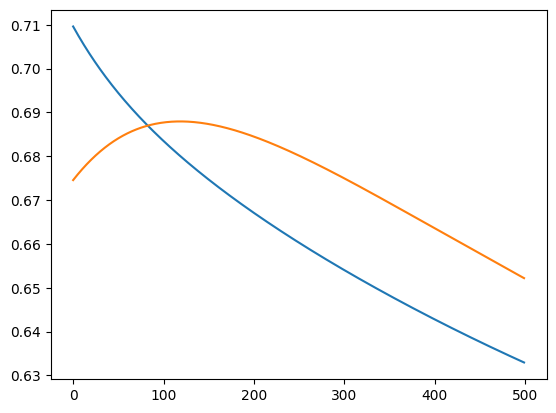

In [ ]:
import matplotlib.pyplot as plt

# Detach and convert each tensor in the list to NumPy
train_loss = [t.detach().numpy() if isinstance(t, torch.Tensor) else t for t in my_train_history_dic['train_loss']]
test_loss = [t.detach().numpy() if isinstance(t, torch.Tensor) else t for t in my_test_history_dic['test_loss']]

# Plot
plt.plot(train_loss)
plt.plot(test_loss)
plt.show()


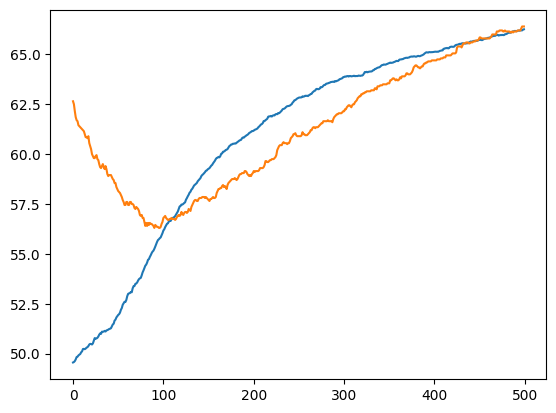

In [ ]:
# Detach and convert each tensor in the list to NumPy
train_accuracy = [t.detach().numpy() if isinstance(t, torch.Tensor) else t for t in my_train_history_dic['train_accuracy']]
test_accuracy = [t.detach().numpy() if isinstance(t, torch.Tensor) else t for t in my_test_history_dic['test_accuracy']]

# Plot
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.show()


In [ ]:
import torch
import torch.nn as nn

class ModelV1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape=1):  # Default `output_shape` is 1 for binary classification
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)


In [ ]:
model_1 = ModelV1(input_shape=11,hidden_units=32,output_shape=1).to(device)
model_1

ModelV1(
  (layer_stack): Sequential(
    (0): Linear(in_features=11, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
loss_fn_1 = nn.BCEWithLogitsLoss()
optimizer  = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return correct / len(y_true) * 100


In [ ]:
def train_one_epoch(model, optimizer, loss_fn, accuracy_fn, X_train, y_train):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item(), accuracy

def evaluate(model, loss_fn, accuracy_fn, X_test, y_test):
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        loss = loss_fn(test_logits, y_test)
        accuracy = accuracy_fn(y_test, test_pred)
    return loss.item(), accuracy


In [ ]:
def log_metrics(epoch, train_loss, train_accuracy, test_loss, test_accuracy):
    print(f"Epoch {epoch + 1}:")
    print(f"Train - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}")
    print(f"Test - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}\n")


In [ ]:
from tqdm import tqdm
epochs = 200
my_train_history_dic={"train_loss":[],"train_accuracy":[]}
my_test_history_dic={"test_loss":[],"test_accuracy":[]}
for epoch in tqdm(range(epochs), desc="Training"):
    train_loss, train_accuracy = train_one_epoch(model_1, optimizer, loss_fn, accuracy_fn, X_train_scaled, y_train)
    test_loss, test_accuracy = evaluate(model_1, loss_fn, accuracy_fn, X_test_scaled, y_test)

    my_train_history_dic['train_loss'].append(train_loss)
    my_train_history_dic['train_accuracy'].append(train_accuracy)
    my_test_history_dic['test_loss'].append(test_loss)
    my_test_history_dic['test_accuracy'].append(test_accuracy)

    if epoch % 100 == 0:
        log_metrics(epoch, train_loss, train_accuracy, test_loss, test_accuracy)


Training:  14%|█▍        | 29/200 [00:00<00:00, 282.56it/s]

Epoch 1:
Train - Loss: 0.6931, Accuracy: 50.95
Test - Loss: 0.6900, Accuracy: 51.15



Training:  82%|████████▏ | 163/200 [00:00<00:00, 330.00it/s]

Epoch 101:
Train - Loss: 0.5432, Accuracy: 79.71
Test - Loss: 0.5453, Accuracy: 79.25



Training: 100%|██████████| 200/200 [00:00<00:00, 317.96it/s]


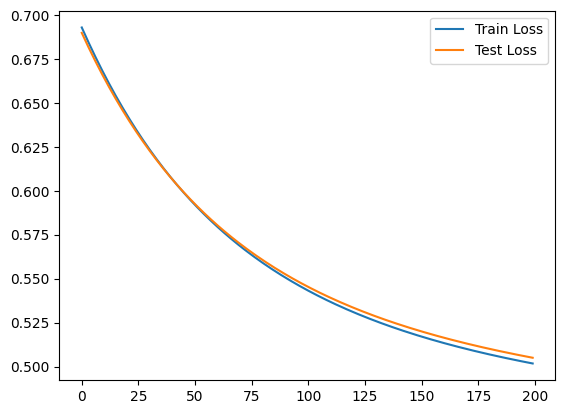

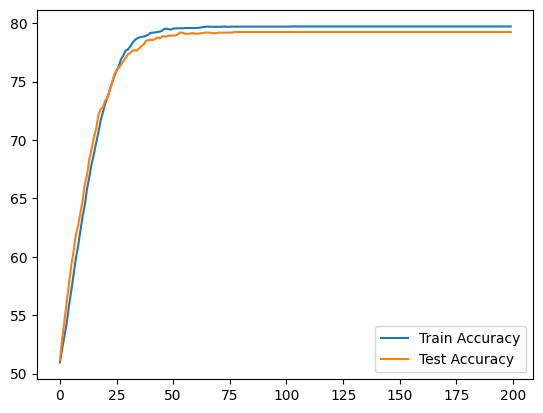

In [ ]:
import matplotlib.pyplot as plt

# Plot losses
plt.plot(my_train_history_dic['train_loss'], label="Train Loss")
plt.plot(my_test_history_dic['test_loss'], label="Test Loss")
plt.legend()
plt.show()

# Plot accuracies
plt.plot(my_train_history_dic['train_accuracy'], label="Train Accuracy")
plt.plot(my_test_history_dic['test_accuracy'], label="Test Accuracy")
plt.legend()
plt.show()


In [ ]:
print(y_train.min(), y_train.max())


tensor(0.) tensor(1.)


# **MNIST DATASET**

doing multiclass prediction using ANNs to get some hand on feel

In [ ]:
import torch

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
train_data = datasets.MNIST(root="data",
                            download=True,
                            train=True,
                            transform=ToTensor(),
                            )


test_data=datasets.MNIST(root="data",
                         download=True,
                         train=False,
                         transform=ToTensor())

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 105MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 80.2MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 42.4MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.0MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_data.targets
# 0-9
# multiclass problem

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
len(train_data.data) ,len(test_data.targets)

(60000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
image.shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

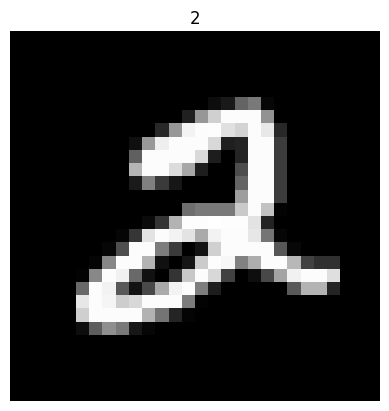

In [ ]:
image,label = train_data[5]
plt.imshow(image.squeeze(),cmap="gray")   #get rid of extra 1 dimension
plt.title(label)
plt.axis("off")

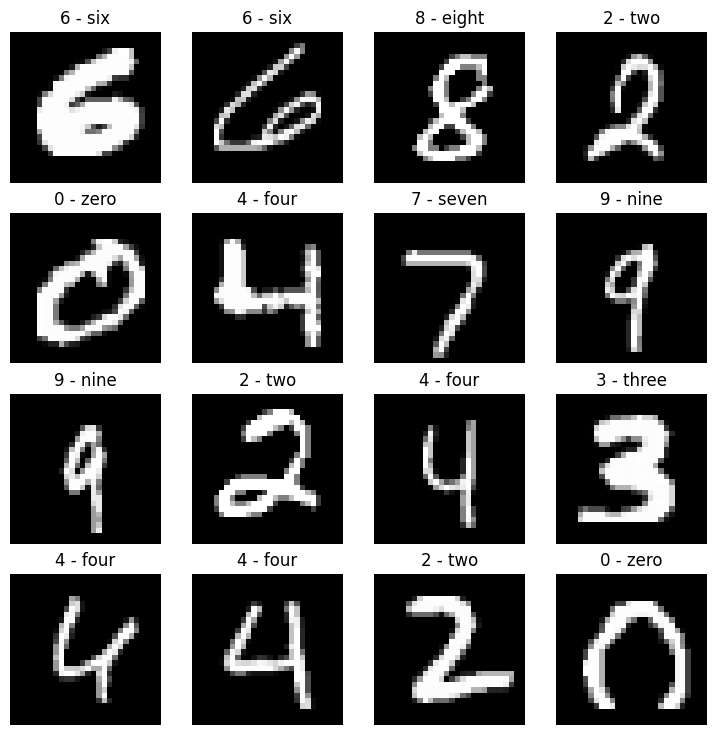

In [ ]:
torch.manual_seed(42)
rows=4
cols=4
fig = plt.figure(figsize=(9,9))
for i in range(1,rows*cols+1):
  random_id = torch.randint(0,len(train_data),size=[1]).item()
  image,label = train_data[random_id]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis("off")

now we pass over data through dataloader so we can do batching
and then pass that into the model

In [ ]:
from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(train_data,batch_size=batch_size,shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [ ]:
print(f"{len(train_dataloader)} batches of training data")
print(f"{len(test_dataloader)} batches of testing data")

1875 batches of training data
313 batches of testing data


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# we have created a batch size of 32

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


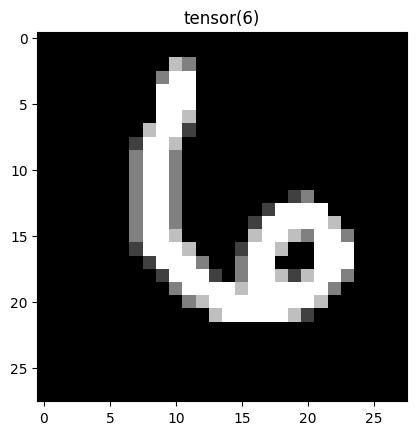

In [ ]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.title(label)
plt.show()

now building the model


In [ ]:
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
class MV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
28*28

784

In [ ]:
model_00 = MV0(input_shape=784,hidden_units=32,output_shape=10)
model_00

MV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

setting up loss , accuracy, and optimizer

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_00.parameters(),lr=0.1)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
from tqdm.auto import tqdm

In [ ]:
epochs = 3
my_train_history_dic={"train_loss":[],"train_accuracy":[]}
my_test_history_dic={"test_loss":[],"test_accuracy":[]}
for epoch in tqdm(range(epochs)):

  # TRAINING


  model_00.train()


  train_loss = 0
  train_acc=0

  for batch,(X,y) in enumerate(train_dataloader):
    y_pred = model_00(X)

    loss=loss_fn(y_pred,y)

    train_loss += loss.item()

    train_acc += accuracy_fn(y,y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if(batch%400 == 0):
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


  train_loss = train_loss/len(train_dataloader)
  train_acc = train_acc/len(train_dataloader)

  my_train_history_dic['train_loss'].append(train_loss)
  my_train_history_dic['train_accuracy'].append(train_acc)


  # TESTING


  model_00.eval()

  with torch.inference_mode():
    test_loss, test_acc = 0, 0
    for X,y in test_dataloader:

      y_pred=model_00(X)

      test_loss += loss_fn(y_pred,y).item()
      test_acc += accuracy_fn(y,y_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)


  my_test_history_dic['test_loss'].append(test_loss)
  my_test_history_dic['test_accuracy'].append(test_acc)
  print(f"\nTrain loss: {train_loss:.5f} | Train acc: {train_acc:.2f}% Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")



  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.39418 | Train acc: 88.86% Test loss: 0.34445, Test acc: 89.83%

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.30691 | Train acc: 91.31% Test loss: 0.29895, Test acc: 91.47%

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.29606 | Train acc: 91.72% Test loss: 0.27936, Test acc: 91.96%



In [ ]:
my_train_history_dic

{'train_loss': [0.3941775552511215, 0.30690782337983447, 0.2960555011143287],
 'train_accuracy': [88.86333333333333, 91.305, 91.715]}

In [ ]:
my_test_history_dic

{'test_loss': [0.34445473747833755, 0.2989456489497718, 0.2793571795203006],
 'test_accuracy': [89.82627795527156, 91.47364217252397, 91.96285942492013]}

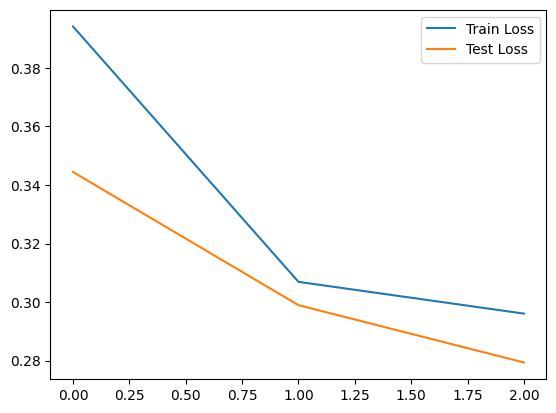

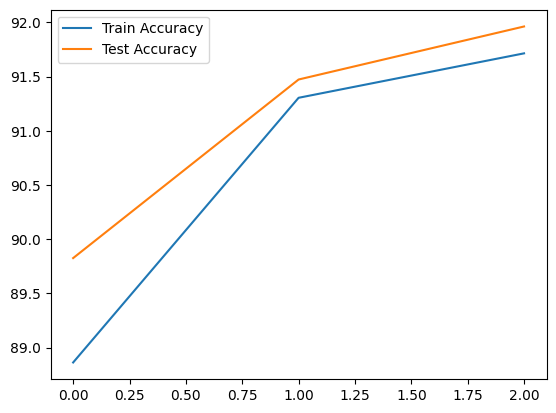

In [ ]:
import matplotlib.pyplot as plt

# Plot losses
plt.plot(my_train_history_dic['train_loss'], label="Train Loss")
plt.plot(my_test_history_dic['test_loss'], label="Test Loss")
plt.legend()
plt.show()

# Plot accuracies
plt.plot(my_train_history_dic['train_accuracy'], label="Train Accuracy")
plt.plot(my_test_history_dic['test_accuracy'], label="Test Accuracy")
plt.legend()
plt.show()
